In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix


In [2]:
header=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
        'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("housing.csv", names=header, delim_whitespace=True)
houses=pd.DataFrame(df).to_numpy()

C:\Users\2018\AppData\Local\Temp\ipykernel_13264\694881418.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.iloc[:]=(Y.iloc[:]-min_Y)/(max_Y-min_Y)


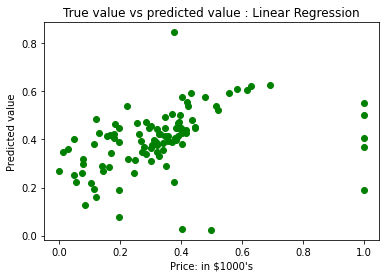

Mean absolute error :  0.19723202717431337
Mean square error :  0.05495265195458584
R squared error -0.0276563857771559
mse 0.21097966034933863
0.8811881188118812


In [3]:
X = df.drop(['MEDV'], axis=1)
Y = df.MEDV
for i in range(13):
    max_X=max(X.iloc[:,i])
    min_X=min(X.iloc[:,i])
    X.iloc[:,i]=(X.iloc[:,i]-min_X)/(max_X-min_X)

max_Y=max(Y.iloc[:])
min_Y=min(Y.iloc[:])
Y.iloc[:]=(Y.iloc[:]-min_Y)/(max_Y-min_Y)

def splitTT(X_norm, percentTrain): 
    # Split dataset into train and test set based on the percentTrain specified
    # Random shuffling of data before splitting
    np.random.shuffle(np.array(X_norm))
    pd.DataFrame(X_norm)
    # Get index to split the data and slice the dataset based on the index
    index = round(len(X_norm)*percentTrain)
    X_train, X_test = X_norm.iloc[:index,:], X_norm.iloc[index:,:]
    X_split = [X_train, X_test]
    return X_split

def splitTTY(Y_norm, percentTrain): 
    # Split dataset into train and test set based on the percentTrain specified
    # Random shuffling of data before splitting
    np.random.shuffle(np.array(Y_norm))
    pd.DataFrame(Y_norm)
    # Get index to split the data and slice the dataset based on the index
    index = round(len(Y_norm)*percentTrain)
    Y_train, Y_test = Y_norm.iloc[:index], Y_norm.iloc[index:]
    Y_split = [Y_train, Y_test]
    return Y_split
X_train,X_test1=splitTT(X,0.6)
X_test,X_cv=splitTT(X_test1,0.5)
Y_train,Y_test1=splitTTY(Y,0.6)
Y_test,Y_cv=splitTTY(Y_test1,0.5)

def rmse(y_test, y_pred):
    N = len(y_test)
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    mse = np.sum((y_test - y_pred)**2) / (2*N) 
    rmse = np.sqrt(mse)
    return rmse
def rmse_lamda(y_test, y_pred,theta0,theta1):
    cost_reg=100
    best_lamda=0
    lamda=np.array([0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24])
    N = len(y_test)
    for l in range(np.size(lamda)):
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)
        mse = (np.sum((y_test - y_pred)**2) / (2*N))+(lamda[l]/2*N)*((np.sum(theta1**2))+theta0**2) 
        rmse = np.sqrt(mse)
        if root_rmse<cost_reg:
            cost_reg=root_rmse
            best_lamda=lamda[l]
    return rmse,best_lamda

def gradient_descent(X, y, a = 0.045, epoch = 1000): #a=learning rate 
    dim = len(X.columns)
    X = np.array(X)
    y = np.array(y)
    # Initialise a random bias/beta0 (represented by b) and weights for the regression equation 
    b = np.random.random()
    logs_df = pd.DataFrame(columns=['RMSE', 'R squared'])
    log_ind = 0
    root_mse = 0
    rsquared = 0
    weights = np.random.rand(dim)
    for e in range(0, epoch+1):
        # Calculate the predicted values of y 
        y_hat = b + np.dot(X, weights) #calc. hypothesis
        # Calculate and log RSME and R squared
        root_rmse = rmse(y, y_hat) #calc. hypothesis cost
        # rsquared = r2(y, y_hat)
        if log_ind%10==0:
            logs_df.loc[log_ind] = [root_rmse, rsquared]
        log_ind += 1
        # Update bias/bias0 and weights
        b = b - a*((np.sum(y_hat - y)*2)/len(y)) #update theta0
        weights = weights - a*((np.dot((y_hat-y),X)*2)/len(y))#update rest thetas
    return y_hat, b, weights,root_rmse
alpha=[0.02,0.01,0.05,0.03]
costs=100
min_index=0
rmse_t=np.zeros(np.size(alpha))
for i in range(np.size(alpha)):#find the best alpha, learning rate
    y_hat, theta0, theta1,root_rmse=gradient_descent(X_train, Y_train, a =alpha[i] , epoch = 1000)
    rmse_t[i]=root_rmse
    if root_rmse<costs:
        cost=root_rmse
        min_index=i
cost_cv=100
theta0_cv=0
theta1_cv=np.zeros(13)
for j in range(13):#cross_validation with best alpha
    y_hat, theta0, theta1,root_rmse=gradient_descent(X_train.iloc[:,0:j], Y_train, a=alpha[min_index] , epoch = 1000)
    y_pred= theta0 + np.dot(X_cv.iloc[:,0:j], theta1)
    root_cv=rmse(Y_cv,y_pred)
    root_reg,lamda_best=rmse_lamda(Y_cv, y_pred,theta0,theta1)
    if root_cv<cost_cv:
        cost_cv=root_cv
        theta0_cv=theta0
        theta1_cv[0:j]=theta1
    if root_reg<cost_cv:
        cost_cv=root_reg
        theta0_cv=theta0
        theta1_cv[0:j]=theta1
y_pred_test=theta0_cv+np.dot(X_test.iloc[:,0:np.size(theta1_cv)], theta1_cv)
cost_Y_test=rmse(Y_test, y_pred_test)
cost_test_reg=rmse(Y_test, y_pred_test)+(lamda_best/2*101)*((np.sum(theta1_cv**2))+theta0_cv**2)


plt.scatter(Y_test, y_pred_test, c = 'green') 
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()
##ROC , accuracy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
print('Mean absolute error : ', metrics.mean_absolute_error(Y_cv, y_pred_test))
print('Mean square error : ', metrics.mean_squared_error(Y_cv, y_pred_test))
print('R squared error', r2_score(Y_test, y_pred_test))
print('mse', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_test)))
print(accuracy_score(np.round(Y_test), np.round((pd.DataFrame(y_pred_test)))) )#score

# plt.scatter(X, y_pred_test)
# plt.show()
